In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils


In [4]:
concrete_strength = pd.read_csv('/content/drive/MyDrive/ANN/concrete.csv')

In [5]:
concrete_strength.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [6]:
concrete_strength.shape

(1030, 9)

In [7]:
concrete_strength.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [8]:
concrete_strength.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [9]:
concrete_strength['strength'].nunique()

845

In [10]:
concrete_strength['strength'].count()

1030

In [13]:
concrete_strength['strength'].value_counts()

33.40    6
35.30    4
71.30    4
23.52    4
79.30    4
        ..
17.34    1
48.70    1
31.64    1
35.85    1
52.61    1
Name: strength, Length: 845, dtype: int64

In [16]:
concrete_strength.agg(['count','size','nunique'])

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030,1030,1030,1030,1030,1030,1030,1030,1030
size,1030,1030,1030,1030,1030,1030,1030,1030,1030
nunique,278,185,156,195,111,284,302,14,845


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


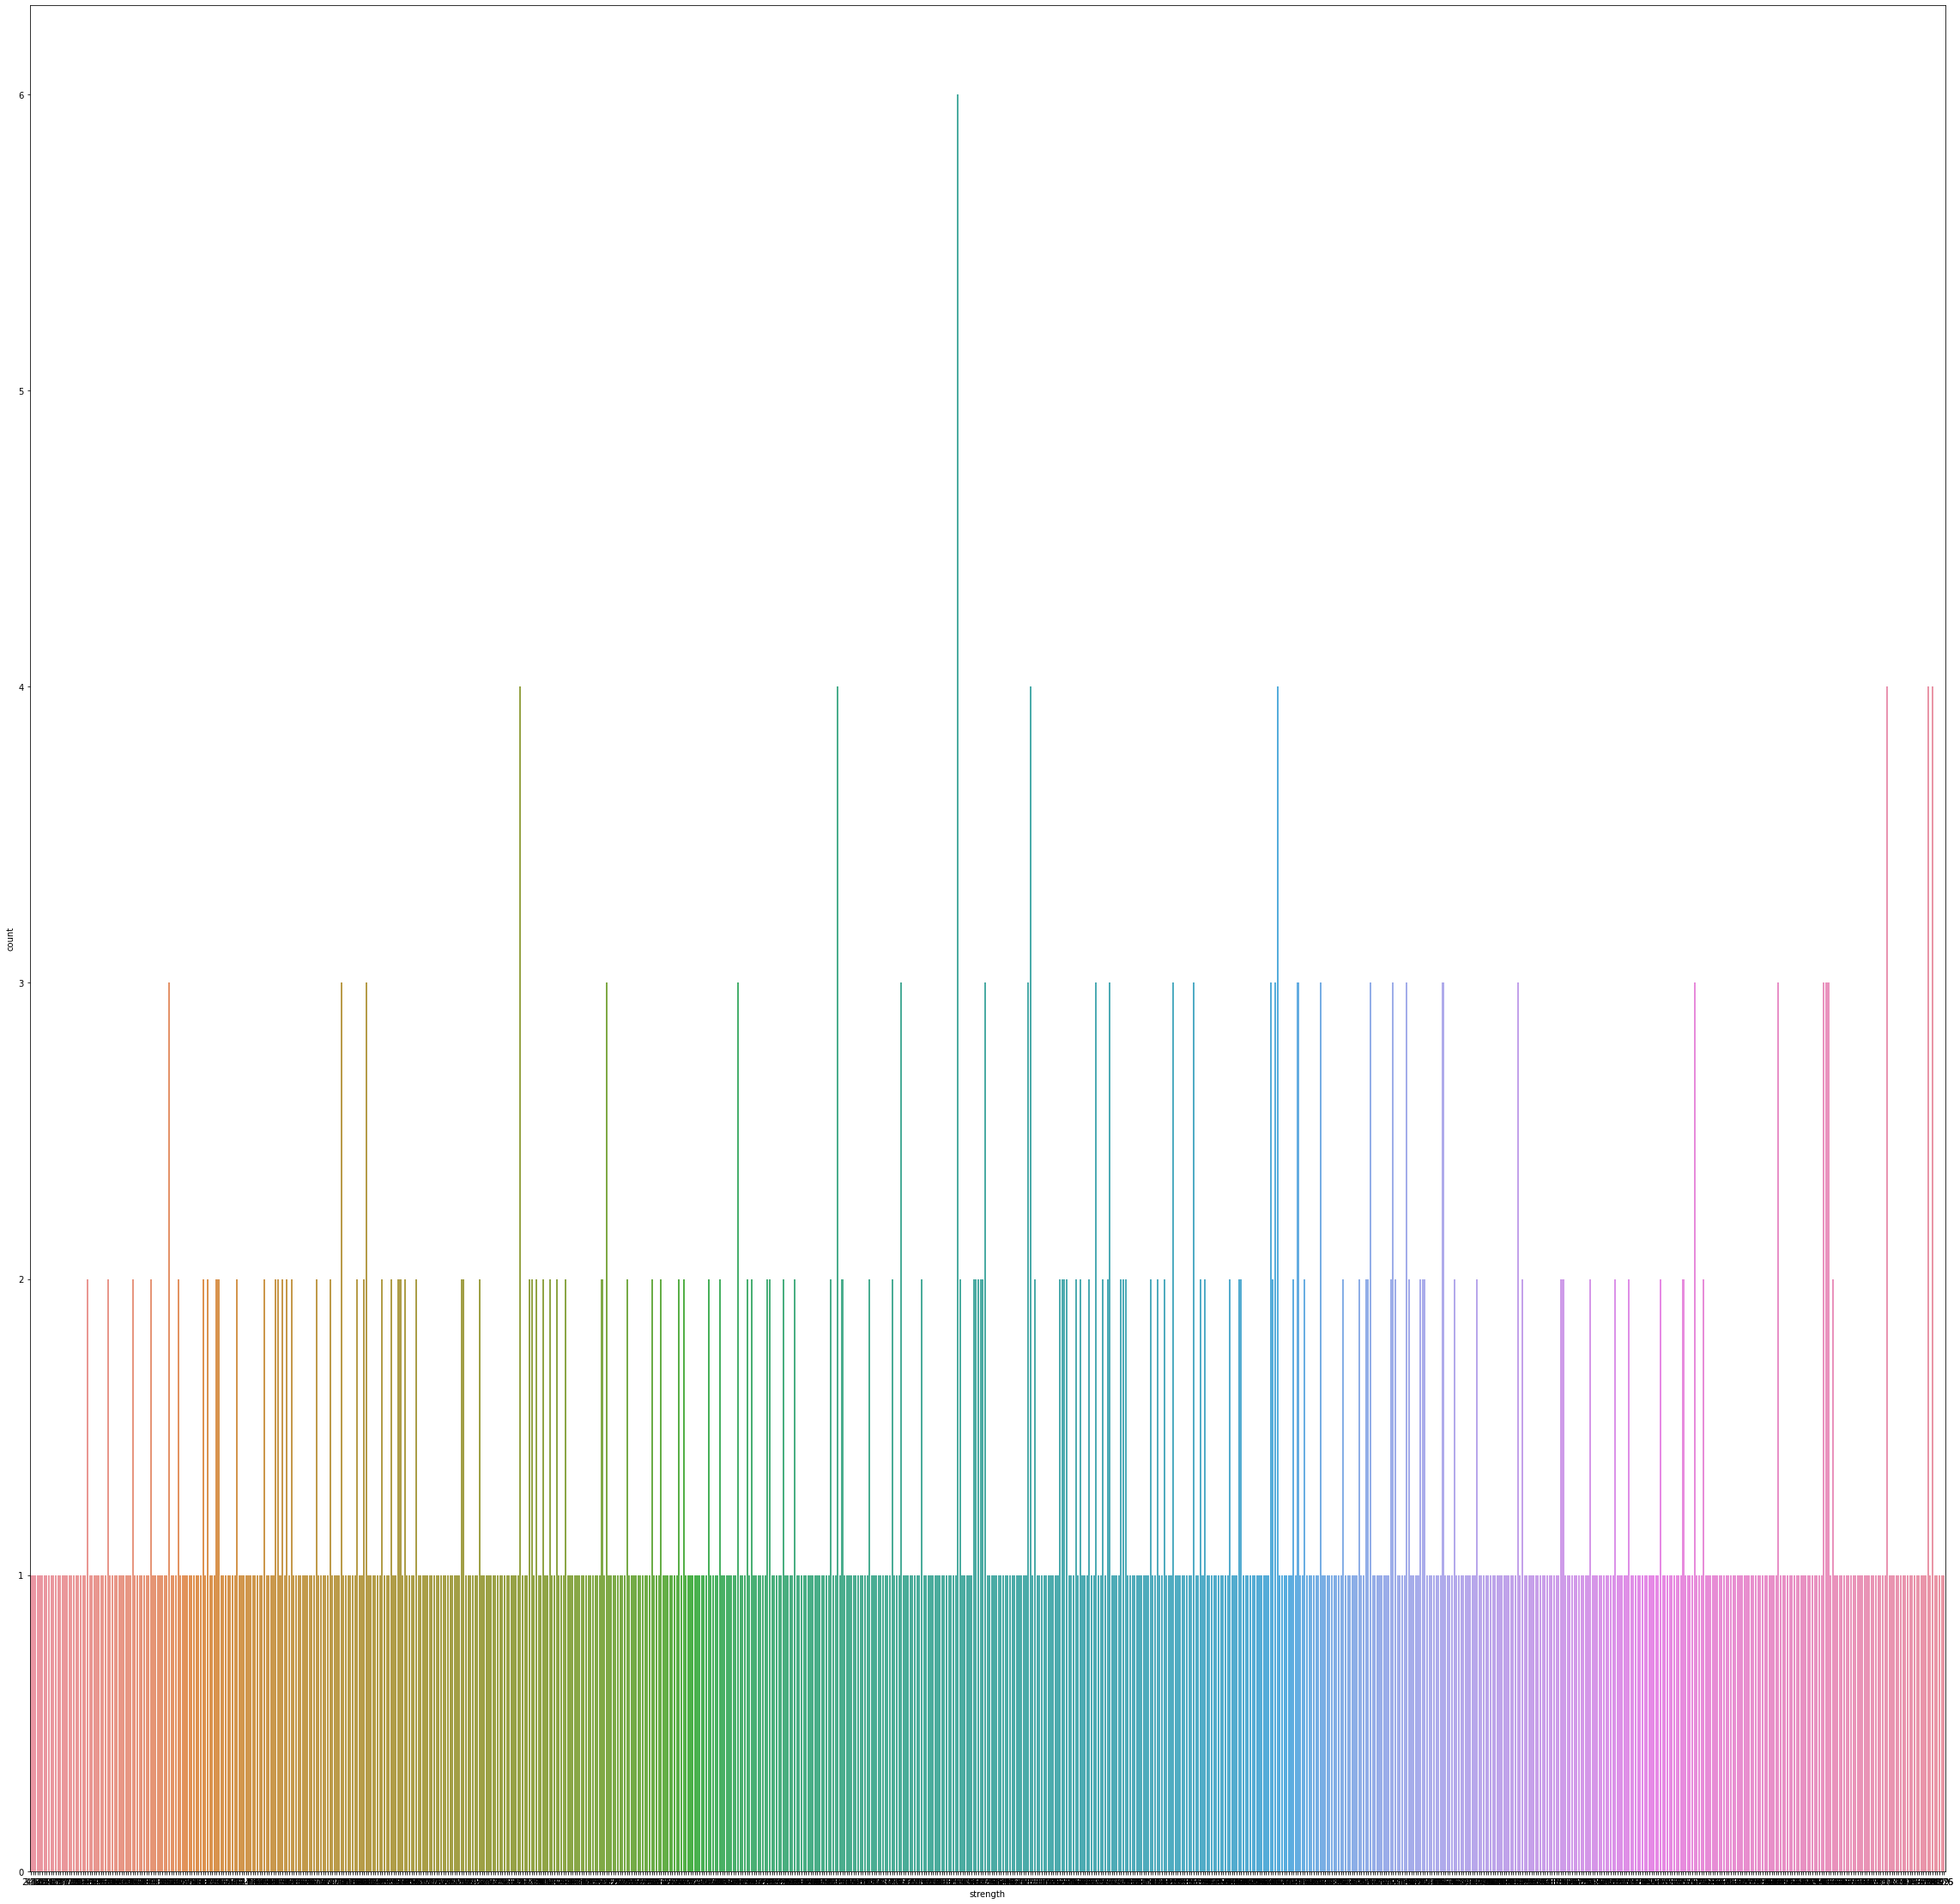

In [21]:
plt.figure(figsize=(40,40))
sns.countplot(concrete_strength['strength'])
plt.show()

In [23]:
concrete_strength1=concrete_strength.duplicated()
sum(concrete_strength1)

25

In [25]:
concrete_strength1 = concrete_strength.drop_duplicates()


In [26]:
data1 = concrete_strength1.describe()

In [27]:
data1  ###### The scales of the data are very different. So, we normalise or standardise the data


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [28]:
concrete_strength.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [29]:
#### Normalization function 

def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)

In [30]:
concrete = norm_func(concrete_strength1)

In [31]:
concrete

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,0.089726,0.589872,0.000000,0.652556,0.000000,0.496512,0.387607,0.074176,0.343341
1,0.152740,0.117418,0.621189,0.291534,0.335404,0.813372,0.507275,0.035714,0.263859
2,0.337900,0.000000,0.478261,0.523962,0.170807,0.453198,0.670346,0.074176,0.334994
3,0.374429,0.317195,0.000000,0.848243,0.000000,0.380814,0.190667,0.074176,0.542170
4,0.120548,0.510295,0.000000,0.571086,0.282609,0.716279,0.257652,0.074176,0.198829
...,...,...,...,...,...,...,...,...,...
1025,0.075342,0.000000,0.829585,0.464856,0.310559,0.465116,0.529353,0.074176,0.136539
1026,0.980137,0.000000,0.000000,0.159744,0.875776,0.148547,0.751882,0.005495,0.485486
1027,0.398174,0.322760,0.451274,0.461661,0.276398,0.200872,0.437280,0.074176,0.522611
1028,0.547945,0.105732,0.000000,0.848243,0.000000,0.380814,0.190667,0.739011,0.656908


In [32]:

def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],kernel_initializer="normal",activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1]))
    model.compile(loss="mean_squared_error",optimizer="adam",metrics = ["accuracy"])
    return (model)


In [34]:
predictors = concrete_strength1.iloc[:,0:8]

In [35]:
target  = concrete_strength1.iloc[:,8]

In [36]:
##### Dividing or partitioning the data 
from sklearn.model_selection import train_test_split

In [38]:
#### Partitioning the data into train and test in train=75% and test=25%
x_train, x_test, y_train, y_test = train_test_split(predictors, target,test_size=0.2,random_state=42)

In [41]:
first_model = prep_model([8,50,1])

In [42]:
first_model.fit(np.array(x_train), np.array(y_train),epochs=900)

Epoch 1/900
26/26 [==============================] - 1s 2ms/step - loss: 588.0917 - accuracy: 0.0000e+00
Epoch 2/900
26/26 [==============================] - 0s 2ms/step - loss: 235.4747 - accuracy: 0.0000e+00
Epoch 3/900
26/26 [==============================] - 0s 1ms/step - loss: 174.8944 - accuracy: 0.0000e+00
Epoch 4/900
26/26 [==============================] - 0s 1ms/step - loss: 145.5055 - accuracy: 0.0000e+00
Epoch 5/900
26/26 [==============================] - 0s 1ms/step - loss: 135.8094 - accuracy: 0.0000e+00
Epoch 6/900
26/26 [==============================] - 0s 2ms/step - loss: 125.7255 - accuracy: 0.0000e+00
Epoch 7/900
26/26 [==============================] - 0s 2ms/step - loss: 121.1133 - accuracy: 0.0000e+00
Epoch 8/900
26/26 [==============================] - 0s 2ms/step - loss: 110.6091 - accuracy: 0.0000e+00
Epoch 9/900
26/26 [==============================] - 0s 2ms/step - loss: 101.6628 - accuracy: 0.0000e+00
Epoch 10/900
26/26 [==============================] - 0

In [43]:
pred_train = first_model.predict(np.array(x_train))

In [44]:
pred_train = pd.Series([i[0] for i in pred_train])

In [46]:
rmse_value = np.sqrt(np.mean((pred_train-y_train)**2))
rmse_value

22.618020077787225

In [47]:
np.corrcoef(pred_train, y_train)

array([[1.        , 0.94566332],
       [0.94566332, 1.        ]])

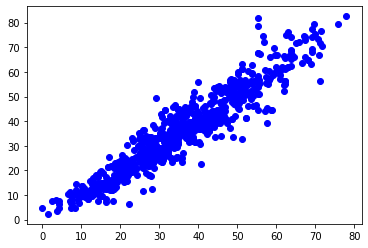

In [48]:

#Visualising 
plt.plot(pred_train,y_train,"bo")


In [49]:

##Predicting on test data
pred_test = first_model.predict(np.array(x_test))

In [50]:
pred_test = pd.Series([i[0] for i in pred_test])

In [51]:
rmse_test = np.sqrt(np.mean((pred_test-y_test)**2))
rmse_test

20.618631638184837

In [52]:
np.corrcoef(pred_test,y_test)

array([[1.        , 0.93783541],
       [0.93783541, 1.        ]])

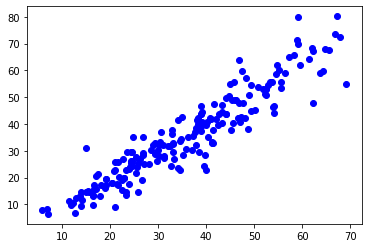

In [53]:
##Visualizing
plt.plot(pred_test,y_test,"bo")